<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Iris-Classification" data-toc-modified-id="Iris-Classification-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Iris Classification</a></span></li><li><span><a href="#Purpose" data-toc-modified-id="Purpose-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Purpose</a></span></li><li><span><a href="#Load-libraries-and-data" data-toc-modified-id="Load-libraries-and-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load libraries and data</a></span></li><li><span><a href="#Helper-functions" data-toc-modified-id="Helper-functions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Helper functions</a></span></li><li><span><a href="#Inspect-and-visualize-the-data" data-toc-modified-id="Inspect-and-visualize-the-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Inspect and visualize the data</a></span><ul class="toc-item"><li><span><a href="#Descriptive-statistics" data-toc-modified-id="Descriptive-statistics-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Descriptive statistics</a></span></li><li><span><a href="#Visualizations" data-toc-modified-id="Visualizations-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Visualizations</a></span></li></ul></li><li><span><a href="#Model-the-data" data-toc-modified-id="Model-the-data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model the data</a></span><ul class="toc-item"><li><span><a href="#Create-validation-data-set" data-toc-modified-id="Create-validation-data-set-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Create validation data set</a></span></li><li><span><a href="#Build-models" data-toc-modified-id="Build-models-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Build models</a></span><ul class="toc-item"><li><span><a href="#Initial-pass" data-toc-modified-id="Initial-pass-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Initial pass</a></span></li><li><span><a href="#Predictions" data-toc-modified-id="Predictions-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>Predictions</a></span></li></ul></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

<h1>Iris Classification</h1>

<img style="float: left; margin-right: 15px;" src="images/iris.jpg" />

# Purpose

The purpose of this write-up is to develop and compare a number of predictive regression models for the classic Iris dataset.  

Goals include:
* Examine and explore the data
* Develop linear and nonlinear models
* Select a 'best' model and examine its prediction accuracy

Dataset source:  [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)



# Load libraries and data

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load libraries
import numpy as np

from pandas import read_csv
from pandas.plotting import scatter_matrix
from pandas import set_option
from pandas import DataFrame

from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import os

In [4]:
dataFile = os.path.join(".", "datasets", "iris.data.csv")
data = read_csv(dataFile, header = 0)

# Helper functions

In [5]:
def corrTableColors(value):
    color = 'black'

    if value == 1:
        color = 'white'
    elif value < -0.7:
        color = 'red'
    elif value > 0.7:
        color = 'green'

    return 'color: %s' % color

# Inspect and visualize the data

## Descriptive statistics

##### Shape

In [6]:
print("data.shape = ", data.shape)

data.shape =  (150, 5)


We have 150 observations, 4 independant variables, and 1 dependant variable.

##### First 20 rows

In [7]:
print(data.head(20))
print("--------")
print(data.dtypes)

    sepalLength  sepalWidth  petalLength  petalWidth        class
0           5.1         3.5          1.4         0.2  Iris-setosa
1           4.9         3.0          1.4         0.2  Iris-setosa
2           4.7         3.2          1.3         0.2  Iris-setosa
3           4.6         3.1          1.5         0.2  Iris-setosa
4           5.0         3.6          1.4         0.2  Iris-setosa
5           5.4         3.9          1.7         0.4  Iris-setosa
6           4.6         3.4          1.4         0.3  Iris-setosa
7           5.0         3.4          1.5         0.2  Iris-setosa
8           4.4         2.9          1.4         0.2  Iris-setosa
9           4.9         3.1          1.5         0.1  Iris-setosa
10          5.4         3.7          1.5         0.2  Iris-setosa
11          4.8         3.4          1.6         0.2  Iris-setosa
12          4.8         3.0          1.4         0.1  Iris-setosa
13          4.3         3.0          1.1         0.1  Iris-setosa
14        

All of the features are numeric except the class.  It also appears the feature values are all of the same scale, so we won't need to account for that later on.

##### Descriptive stats

In [8]:
set_option('display.width', 200)
set_option('precision', 2)
data.describe()

sepalLength  sepalWidth  petalLength  petalWidth
count       150.00      150.00       150.00      150.00
mean          5.84        3.05         3.76        1.20
std           0.83        0.43         1.76        0.76
min           4.30        2.00         1.00        0.10
25%           5.10        2.80         1.60        0.30
50%           5.80        3.00         4.35        1.30
75%           6.40        3.30         5.10        1.80
max           7.90        4.40         6.90        2.50

##### Class distribution

In [9]:
data.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

We have an even distribution of classes amongst the samples.  This is good news for us, so that we don't have to account for a disparity in the number of classes within the observations when creating the predictive models.

##### Correlation

In [10]:
corr = data.corr(method = "pearson")
corr.style.applymap(corrTableColors)

I don't think there is any surprise that the various components of the flower are correlated with one another...

##### Skew

In [11]:
data.skew()

sepalLength    0.31
sepalWidth     0.33
petalLength   -0.27
petalWidth    -0.10
dtype: float64

The distributions don't seem overly skewed one way or another, and we'll be able to visually confirm this in the next section.

## Visualizations

##### Histograms

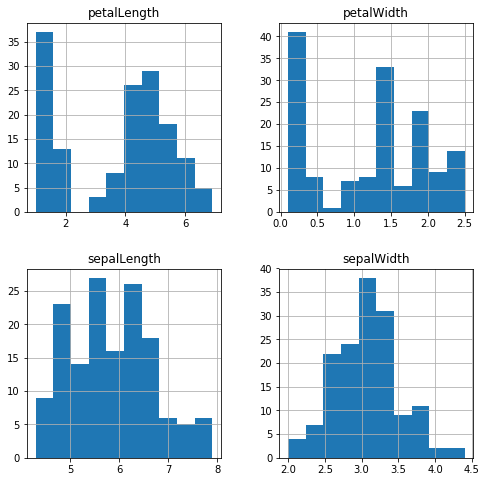

In [12]:
data.hist(figsize = (8,8))
pyplot.show()

Two of the distributions appear to be Gaussian, and we don't appear to have any exponential or bimodal distributions similiar to what we found in the Boston housing data.

##### Density plots

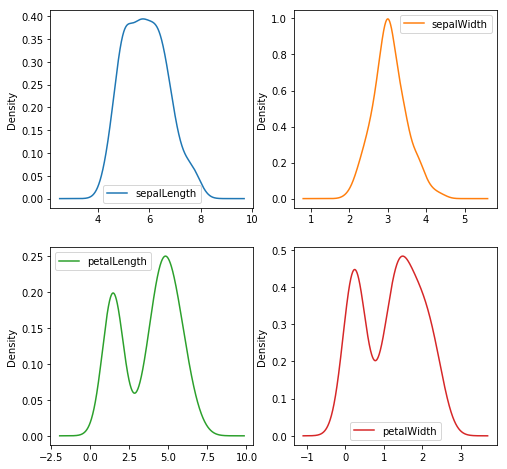

In [13]:
data.plot(kind = 'density', subplots = True, layout = (2,2), sharex = False, figsize = (8,8))
pyplot.show()

##### Box and whisker plots

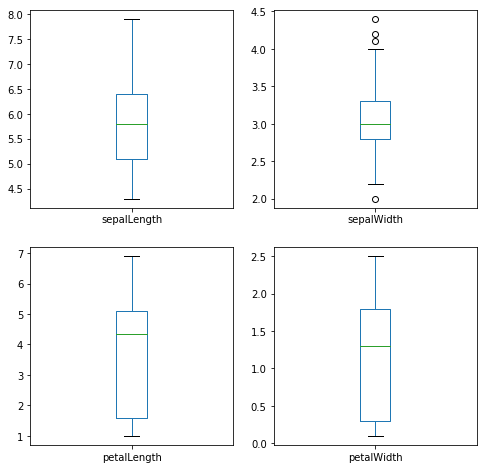

In [14]:
data.plot(kind="box", subplots = True, layout = (2,2), sharex = False, sharey = False, figsize = (8,8))
pyplot.show()

The features appear to be well formed without an overly wide spread or excessive outliers other than a few in the `sepalWidth` variable.

##### Scatter plot matrix

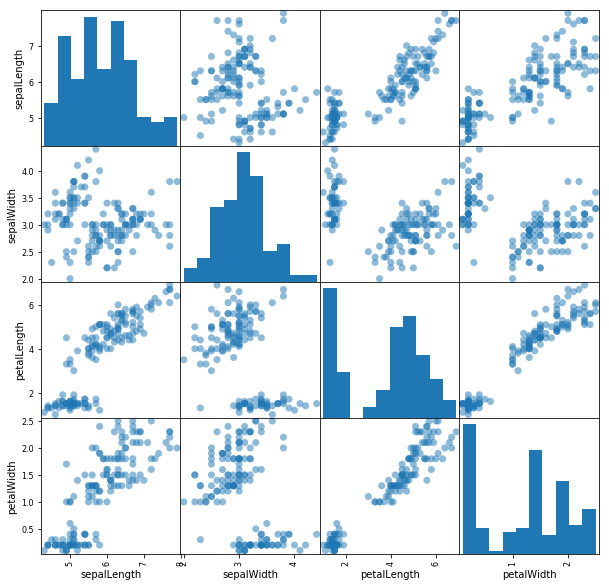

In [15]:
scatter_matrix(data, figsize=(10, 10), s = 200)
pyplot.show()

The scatter plot matrix reinforces visually what we saw above in regard to correlations between features.  For example, it isn't surprising that `petalLength` and `petalWidth` are highly correlated (0.96).

##### Heatmap

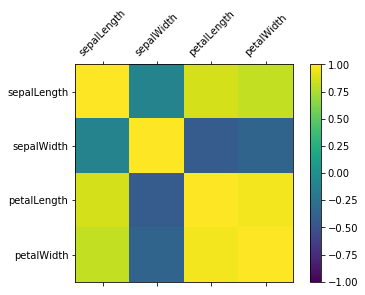

In [16]:
figure = pyplot.figure()
axis = figure.add_subplot(111)
graph = axis.matshow(corr, vmin = -1, vmax = 1)
figure.colorbar(graph)
ticks = np.arange(0, 4, 1)
axis.set_xticks(ticks)
axis.set_yticks(ticks)
axis.set_xticklabels(list(data)[0:4], rotation='45')
axis.set_yticklabels(list(data)[0:4])
pyplot.show()

# Model the data

## Create validation data set

In [17]:
# Seperate X and Y values
x = data.values[:, 0:4]
y = data.values[:, 4]

print("x.shape = ", x.shape)
print("y.shape = ", y.shape)

# Split out validation set -- 80/20 split
seed = 10
valSize = 0.2

xTrain, xVal, yTrain, yVal = train_test_split(x, y, test_size = valSize, random_state = seed)

print("--------")
print("xTrain.shape = ", xTrain.shape)
print("yTrain.shape = ", yTrain.shape)
print("xVal.shape = ", xVal.shape)
print("yVal.shape = ", yVal.shape)


x.shape =  (150, 4)
y.shape =  (150,)
--------
xTrain.shape =  (120, 4)
yTrain.shape =  (120,)
xVal.shape =  (30, 4)
yVal.shape =  (30,)


## Build models

### Initial pass

In [18]:
# Init vars
models = []
results = {}
folds = 10
seed = 10
score = 'accuracy'

# Instantiate model objects
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Create a Pandas DF to hold all our spiffy results
df = DataFrame(columns = ['Model', 'Mean', 'StdDev'])

# Run the models
for modelName, model in models:
    # Implement K-fold cross validation where K = 10
    kFold = KFold(n_splits = folds, random_state = seed)
    results[modelName] = cross_val_score(model, xTrain, yTrain, cv = kFold, scoring = score)
    df.loc[len(df)] = list([modelName, results[modelName].mean(), results[modelName].std()])

# Print results sorted by Mean desc, StdDev asc, Model asc
print(df.sort_values(by = ['Mean', 'StdDev', 'Model'], ascending = [False, True, True]))

  Model  Mean  StdDev
5   SVM  0.97    0.04
1   LDA  0.97    0.05
2   KNN  0.96    0.06
0    LR  0.94    0.10
4    NB  0.93    0.08
3  CART  0.92    0.06


All the models have exellent training results on the data.  SVM barely squeaks out in the lead due the 0.01 difference in standard deviation.

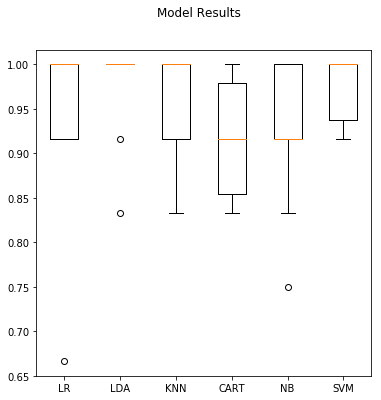

In [19]:
figure = pyplot.figure(figsize = (6,6))
figure.suptitle("Model Results")
axis = figure.add_subplot(111)
pyplot.boxplot(results.values())
axis.set_xticklabels(results.keys())
pyplot.show()

We can see that at more than one model achieved 100% accuracy on a given sample, and we can also see how well the SVM did on the training set.

### Predictions

Due to the simple nature of the dataset and the results of the models so far we'll move right into the prediction stage.  We'll create a loop to process the test dataset with each model and output the accuracy rate, confusion matrix, and classification report.

In [20]:
# Let's examine predictions from the top three models
for i, m in enumerate(models):
    pModelName = m[0]
    pModel = m[1]
    
    pModel.fit(xTrain, yTrain)
    preds = pModel.predict(xVal)
        
    print("*************")
    print("*", pModelName)
    print("*************\n")
    print("accuracy_score = ", accuracy_score(yVal, preds), "\n")
    print("confusion_matrix\n", confusion_matrix(yVal, preds), "\n")
    print("classification_report\n", classification_report(yVal, preds))
    print("")
    print("")
    
    if i > 1:
        break
    
    

*************
* LR
*************

accuracy_score =  0.9 

confusion_matrix
 [[10  0  0]
 [ 0 10  3]
 [ 0  0  7]] 

classification_report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.77      0.87        13
 Iris-virginica       0.70      1.00      0.82         7

    avg / total       0.93      0.90      0.90        30



*************
* LDA
*************

accuracy_score =  1.0 

confusion_matrix
 [[10  0  0]
 [ 0 13  0]
 [ 0  0  7]] 

classification_report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         7

    avg / total       1.00      1.00      1.00        30



*************
* KNN
*************

accuracy_score =  0.9666666666666667 

confusion_matrix
 [[10  0  0]
 [ 0 12  1]
 [ 0  0  7]] 

classificati

# Summary

Each of the models considered does very well on this simple data set.  However, Linear Discriminant Analysis narrowly beats out the other models for the best performance with a reported accuracy score of 100%.